In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.corpus import stopwords
import string

In [2]:
email_df = pd.read_csv('data/emailSpam.csv')

In [3]:
email_df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email_df.shape

(5572, 2)

In [5]:
email_df.drop_duplicates(inplace=True)

In [6]:
email_df.shape

(5157, 2)

In [7]:
email_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEPTUNE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def procrss_text(text):
    # 1 remove punctuation 
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # 2 remove stopwords
    clean_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_word

In [10]:
email_df['Message'].head().apply(procrss_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [11]:
# Example 
msg1 = 'hello world hello hello world play'
msg2 = 'fork fork fork test hello test'

# convert the text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
ans = CountVectorizer(analyzer=procrss_text).fit_transform([[msg1],[msg2]])
print(ans)


  (0, 1)	3
  (0, 4)	2
  (0, 2)	1
  (1, 1)	1
  (1, 0)	3
  (1, 3)	2


In [12]:
# convert a collection of text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=procrss_text).fit_transform(email_df['Message'])

In [13]:
# split data to 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(messages_bow,email_df['Category'],test_size=0.20,random_state=0)

In [14]:
messages_bow.shape

(5157, 11422)

In [15]:
# creat and trean the Naive Bayes Classifier

# Each algorithm of NB expects different types of data.
    # GaussianNB → When you have continuous features.
    # CategoricalNB → When you have categorical data.
    # MultinomialNB → Applied to text data.
    
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train,y_train)

In [16]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       0.98      0.97      0.98       506

    accuracy                           0.99      4125
   macro avg       0.99      0.99      0.99      4125
weighted avg       0.99      0.99      0.99      4125


[[3611    8]
 [  13  493]]

0.9949090909090909


In [17]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       0.81      0.93      0.86       135

    accuracy                           0.96      1032
   macro avg       0.90      0.95      0.92      1032
weighted avg       0.96      0.96      0.96      1032


[[867  30]
 [ 10 125]]

0.9612403100775194


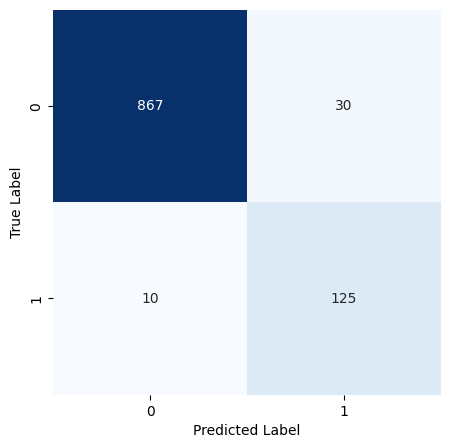

In [18]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
print(pred)
print(y_test)
print(x_test)

[0 0 0 ... 0 0 0]
1512    0
4824    0
2983    0
2133    1
1903    0
       ..
1948    0
5275    0
2404    0
3853    0
3369    0
Name: Category, Length: 1032, dtype: int64
  (0, 6120)	1
  (0, 8564)	1
  (0, 3083)	1
  (0, 10543)	1
  (0, 7001)	1
  (0, 9938)	1
  (0, 5441)	1
  (0, 4349)	1
  (0, 8161)	1
  (0, 8843)	1
  (0, 10062)	1
  (0, 6263)	1
  (2, 2344)	1
  (2, 4414)	1
  (2, 4019)	1
  (3, 5272)	1
  (3, 5771)	1
  (3, 9346)	1
  (3, 10103)	1
  (3, 1551)	1
  (3, 5333)	1
  (3, 6063)	1
  (3, 8614)	1
  (3, 10899)	1
  (3, 8594)	1
  :	:
  (1027, 1766)	1
  (1028, 3057)	1
  (1028, 11286)	1
  (1028, 6496)	1
  (1028, 5535)	1
  (1029, 2350)	1
  (1029, 10654)	1
  (1029, 6847)	1
  (1029, 4687)	1
  (1029, 8828)	1
  (1029, 6743)	1
  (1029, 6179)	1
  (1029, 5051)	1
  (1029, 2440)	1
  (1029, 5505)	1
  (1030, 10695)	1
  (1030, 7936)	1
  (1030, 6053)	1
  (1030, 7644)	1
  (1030, 10646)	1
  (1031, 2220)	1
  (1031, 10090)	1
  (1031, 8091)	1
  (1031, 10527)	1
  (1031, 6271)	1
